# Morfolojik İşlemler

Morfolojik işlemler, görüntü üzerinde şekil ve yapısıyla ilgili temel operasyonlardır. Morfolojik işlemler, görüntünün morfolojik özelliklerini vurgulamak, gürültüyü azaltmak, nesneleri birbirinden ayırmak veya birleştirmek gibi birçok uygulamada kullanılır.

Morfolojik işlemler, yapılandırma elemanı (structuring element) adı verilen bir maske kullanılarak gerçekleştirilir. Yapılandırma elemanı, işlemin karakteristiğini belirleyen bir şekle sahip bir matristir. Temel morfolojik işlemler şunlardır:


* Genişletme (Dilation): Genişletme işlemi, görüntü üzerinde yapılandırma elemanının ilerletilerek nesnelerin veya yapıların büyütülmesini sağlar. Yapılandırma elemanı, görüntü üzerinde kaydırılarak en az bir pikselin tamamı üzerinde örtüştüğü herhangi bir pikseli etkiler. Genişletme işlemi, nesnelerin büyüklüğünü veya kalınlığını artırırken, delikleri doldurarak veya kenarları birleştirerek görüntüdeki boşlukları doldurabilir.

* Aşındırma (Erosion): Aşındırma işlemi, görüntü üzerinde yapılandırma elemanının ilerletilerek nesnelerin veya yapıların küçültülmesini sağlar. Yapılandırma elemanı, görüntü üzerinde kaydırılarak tüm piksellerin ilgili yapılandırma elemanı ile örtüşmesi gereken herhangi bir piksel üzerinde etkili olur. Aşındırma işlemi, nesnelerin boyutunu veya kalınlığını azaltırken, küçük parçaları veya gürültüyü kaldırabilir.

* Açma (Opening): Açma işlemi, önce aşındırma ve ardından genişletme işlemlerinin uygulanmasıyla gerçekleştirilir. Aşındırma işlemi, gürültüyü veya ince yapıları kaldırırken, genişletme işlemi, nesneleri veya yapıları geri getirir. Açma işlemi, nesnelerin pürüzsüzleştirilmesi ve kenarlarının iyileştirilmesi için kullanılır.


* Kapatma (Closing) işlemi, önce genişletme (dilation) ve ardından aşındırma (erosion) işlemlerinin uygulanmasıyla gerçekleştirilen bir morfolojik işlemdir. Kapatma işlemi, açma işleminin tam tersidir ve görüntü üzerindeki boşlukları doldurmak veya nesneleri birleştirmek için kullanılır.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

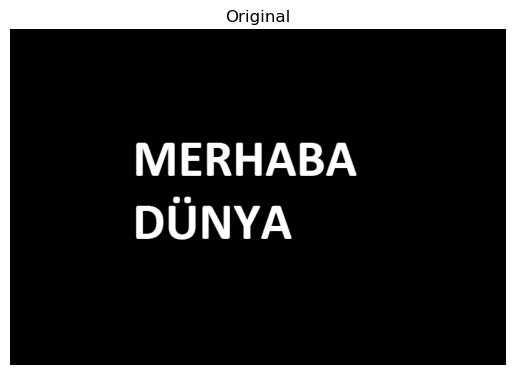

In [19]:
img= cv2.imread("image.png",0)
plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.show()

##### EROSION

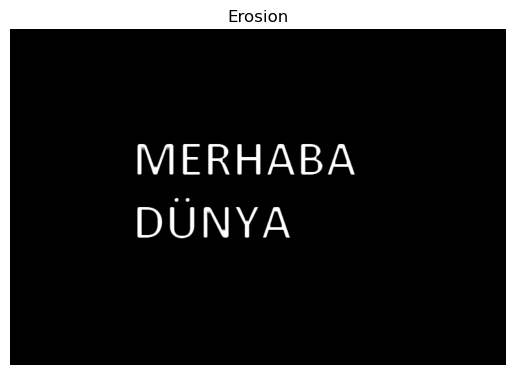

In [20]:
kernel= np.ones((5,5),dtype=np.uint8)
result= cv2.erode(img,kernel, iterations = 1)
plt.figure()
plt.imshow(result, cmap="gray")
plt.axis("off")
plt.title("Erosion")
plt.show()

###### EROSION WITH ITERATION 2

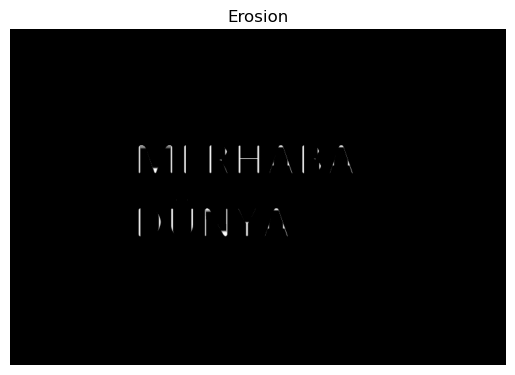

In [21]:
kernel= np.ones((5,5),dtype=np.uint8)
result= cv2.erode(img,kernel, iterations = 2)
plt.figure()
plt.imshow(result, cmap="gray")
plt.axis("off")
plt.title("Erosion")
plt.show()

###### DILATION

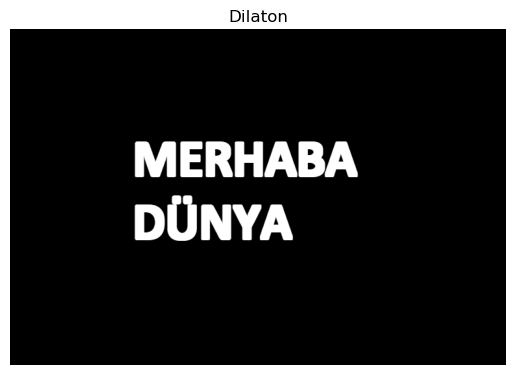

In [22]:
result2= cv2.dilate(img,kernel, iterations = 1)
plt.figure()
plt.imshow(result2, cmap="gray")
plt.axis("off")
plt.title("Dilaton")
plt.show()

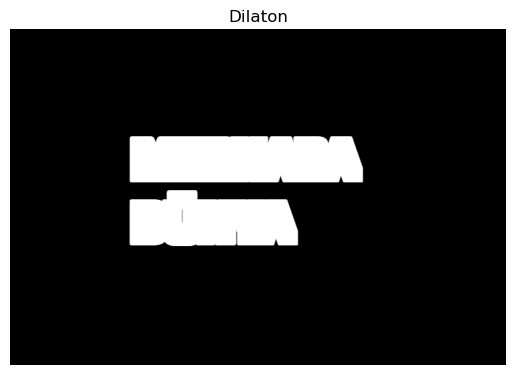

In [23]:
result2= cv2.dilate(img,kernel, iterations = 5)
plt.figure()
plt.imshow(result2, cmap="gray")
plt.axis("off")
plt.title("Dilaton")
plt.show()

###### OPENING

* Açılma yöntemi gürültüyü azaltmak için kullanılır. Beyaz gürültüyü azaltmak için kullanılır. Bir beyaz gürültü ile resmimizi birleştirip ardından Opening işlemini gerçekleştirelim.

###### White Noise Oluşturma

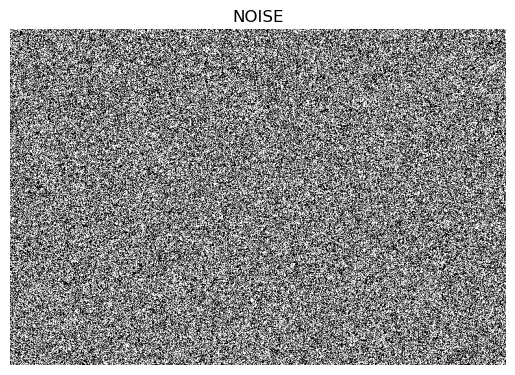

In [24]:
whiteNoise= np.random.randint(0,2, size= img.shape[:2])
whiteNoise= whiteNoise*255
plt.figure()
plt.imshow(whiteNoise, cmap="gray")
plt.axis("off")
plt.title("NOISE")
plt.show()

###### Noise İle Görüntü Birleştirme

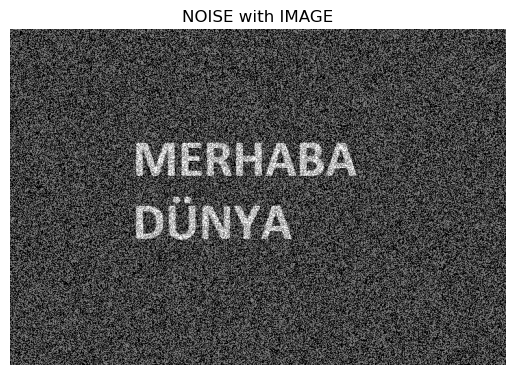

In [25]:
noise_img = whiteNoise+ img
plt.figure()
plt.imshow(noise_img, cmap="gray")
plt.axis("off")
plt.title("NOISE with IMAGE")
plt.show()


##### Opening Uygulanması

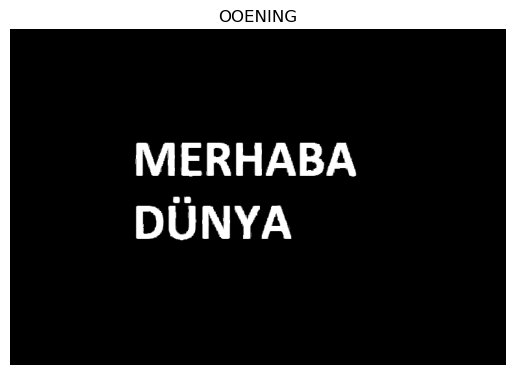

In [27]:
opening= cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)
plt.figure()
plt.imshow(opening, cmap="gray")
plt.axis("off")
plt.title("OOENING")
plt.show()

##### Closing

* Closing işlemi black görüntü üzerine uygulanır.

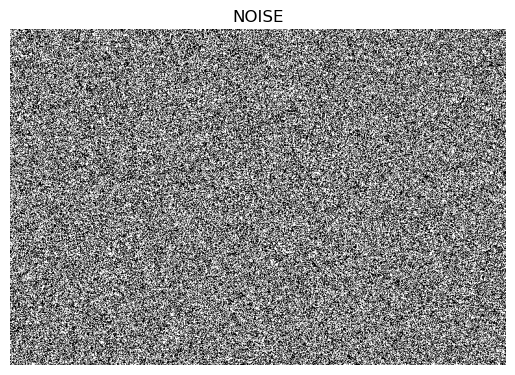

In [28]:
blackNoise= np.random.randint(0,2, size= img.shape[:2])
blackNoise= blackNoise*-255
plt.figure()
plt.imshow(blackNoise, cmap="gray")
plt.axis("off")
plt.title("NOISE")
plt.show()

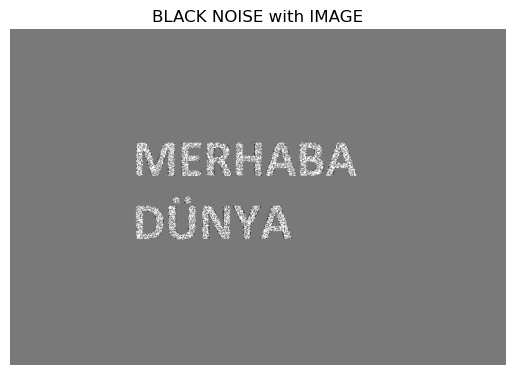

In [29]:
blackNoiseImage= blackNoise+ img
#Black Noise için filtre
blackNoiseImage[blackNoiseImage <=-245]= 0
plt.figure()
plt.imshow(blackNoiseImage, cmap="gray")
plt.axis("off")
plt.title("BLACK NOISE with IMAGE")
plt.show()

##### Closing 

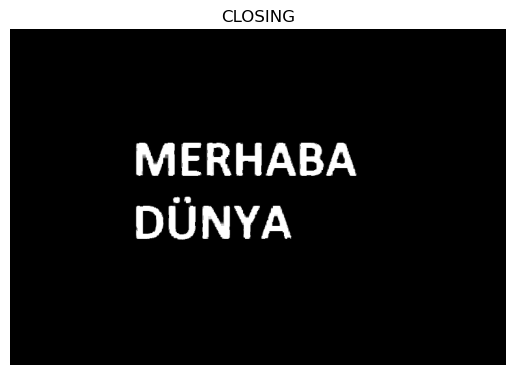

In [31]:
closing= cv2.morphologyEx(blackNoiseImage.astype(np.float32), cv2.MORPH_CLOSE, kernel)
plt.figure()
plt.imshow(closing, cmap="gray")
plt.axis("off")
plt.title("CLOSING")
plt.show()

##### Gradient

Morfolojik gradyan (Morphological Gradient): Bu yöntemde, genişletme ve aşındırma işlemleri uygulanmış görüntüler arasındaki fark alınır. Genişletme işlemi uygulanmış görüntüden aşındırma işlemi uygulanmış görüntü çıkarılır. Bu işlem, genişletme işlemi ile oluşan çıkıntı veya yapışık nesnelerin kenarlarını vurgular. Nesnelerin kenarlarına karşılık gelen piksellerin değerleri yüksek olurken, diğer bölgelerde daha düşük değerlere sahip olur.

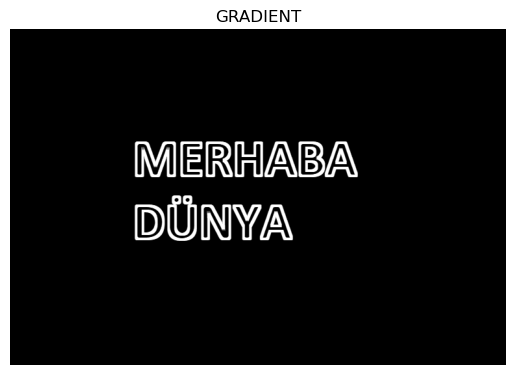

In [35]:
gradient= cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)
plt.figure()
plt.imshow(gradient, cmap="gray")
plt.axis("off")
plt.title("GRADIENT")
plt.show()

Yazı üzerindeki kenarlar elde edildi.